In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
data = pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
# Renaming columns
data.rename(columns = {'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'}, inplace = True)

In [ ]:
#EDA and Visualization
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


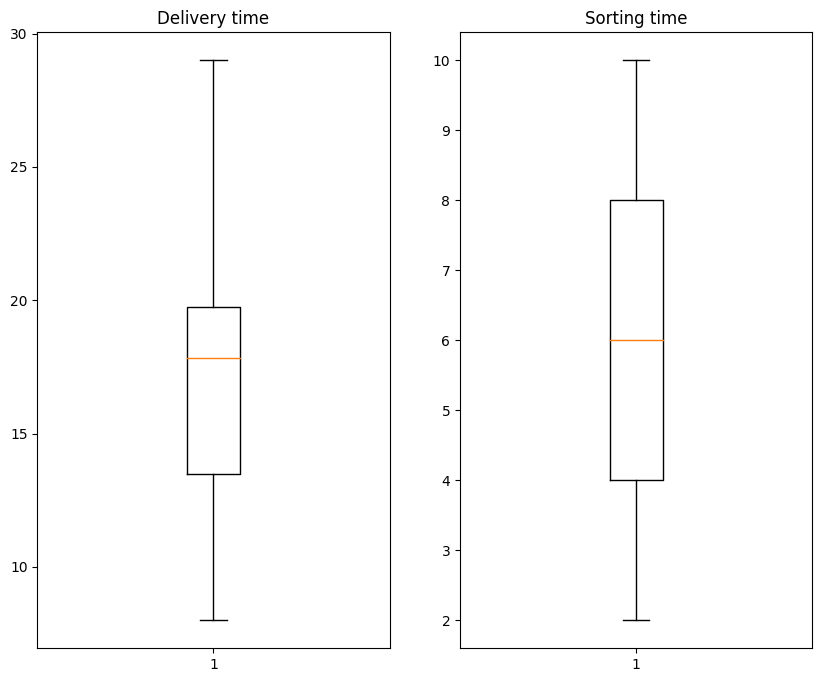

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(121)
plt.boxplot(data['delivery_time'])
plt.title('Delivery time')
plt.subplot(122)
plt.boxplot(data['sorting_time'])
plt.title('Sorting time')
plt.show()

<ipython-input-55-2eb91e11e182>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

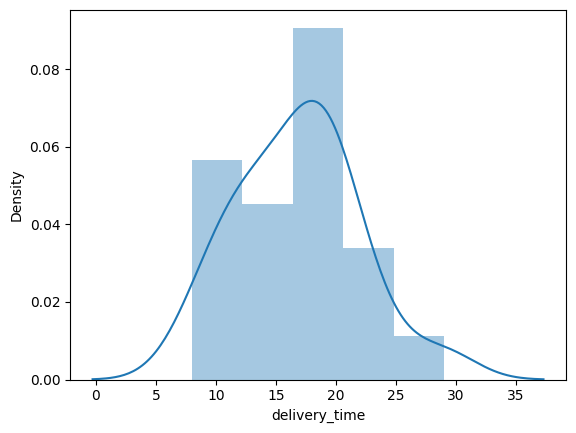

In [ ]:
sns.distplot(data['delivery_time'])

<ipython-input-56-2b17bb6b1b9d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sorting_time'])


<Axes: xlabel='sorting_time', ylabel='Density'>

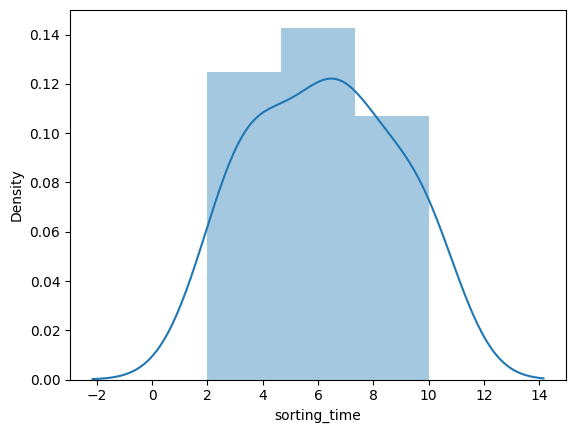

In [ ]:
sns.distplot(data['sorting_time'])

In [ ]:
#Correlation
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

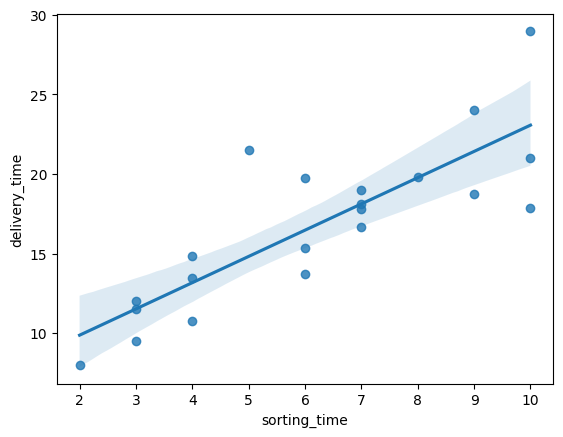

In [ ]:
sns.regplot(x = data['sorting_time'], y = data['delivery_time'])

### Model Building

In [ ]:
model = smf.ols("delivery_time~sorting_time", data=data).fit()

### Model Testing

In [ ]:
# Finding Coeffecient Parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
# Finding RSquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### Model Predictions

In [ ]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [ ]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [ ]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [ ]:
predicted = pd.DataFrame()
predicted['sorting_time'] = data.sorting_time
predicted['delivery_time'] = data.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted.sorting_time))
predicted

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
